In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

import numpy as np


In [3]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        
        self.fc1 = nn.Linear(16 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.flatten(x)
        
        x = self.fc1(x)
        x = self.fc2(x)
        
        return x

In [8]:
train_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.AutoAugment(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.3, 0.3, 0.3))
])

train_dataset = datasets.CIFAR10(root="./data/CIFAR10_data", train=True, transform=train_transform,download=True)
train_loader = DataLoader(train_dataset,batch_size=64, shuffle=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/CIFAR10_data\cifar-10-python.tar.gz to ./data/CIFAR10_data


In [9]:
model = MyModel()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [10]:
def mixup_data(x, y, alpha= 1.0):
    batch_size = x.size(0)
    lam = torch.rand(batch_size, 1, 1, 1)
    lam = torch.max(lam, 1 - lam)
    mixed_x = lam * x + (1-lam) * x.flip(dims=[0, 2, 3])
    """
    lam * x : flip depending on batch dimension?
    """
    
    
    indices = torch.randperm(batch_size)
    mixed_y = lam.squeeze() * y + (1-lam.squeeze()) * y[indices]
    """
    lam.squeeze() * y -> mult lam rate value on y label
    
    """
    
    mixed_y = mixed_y.type(torch.long)
    
    return mixed_x, mixed_y

In [11]:
def plot_images(imgs, labels, title):
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    fig.suptitle(title, fontsize=16)
    labels = labels.numpy()
    for i, ax in enumerate(axes.flat) :
        img = imgs[i].squeeze()
        ax.imshow(img, cmap='gray')
        ax.set_title(f"Label : {labels[i]}")
        ax.axis('off')
        
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

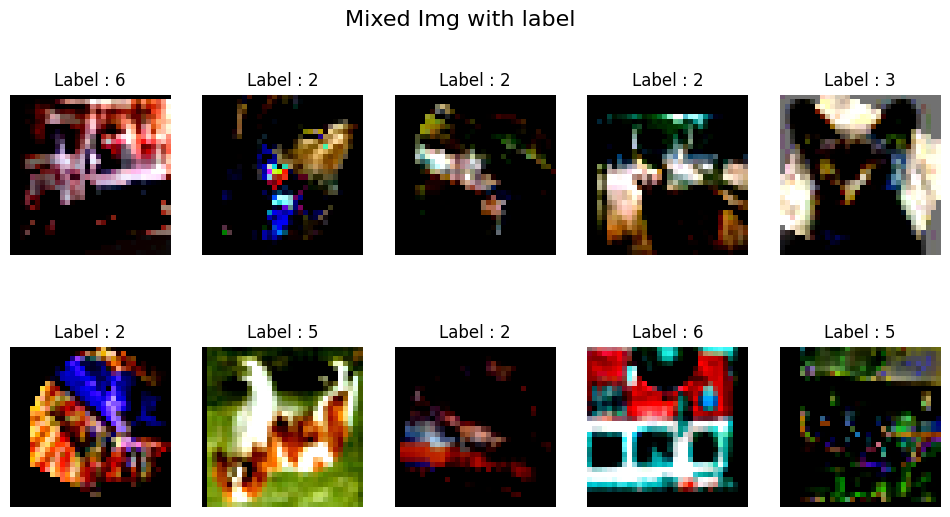

In [15]:
num_epochs = 10

train_losses = []
train_losses_mixup = []

end_idx = 0
for epoch in range(num_epochs):
    train_loss = 0.0
    train_loss_mix = 0.0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        
        inputs_, labels_ = mixup_data(inputs, labels)
        
        mixed_x, mixed_y = mixup_data(inputs_, labels_)
        
        mixed_imgs = mixed_x.cpu().numpy()
        mixed_imgs = np.transpose(mixed_imgs, (0, 2, 3, 1))
        mixed_imgs = np.squeeze(mixed_imgs)
        
        if end_idx == 0:
            plot_images(mixed_imgs, mixed_y.squeeze(), "Mixed Img with label")
            end_idx = 1
            
        outputs = model(inputs)
        outputs_mixup = model(inputs_)
        
        labels_ = torch.squeeze(labels_)
        
        loss = criterion(outputs, labels_) #labels are not mixed up
        loss_mixup = criterion(outputs_mixup, labels_)
        
        loss.backward()
        loss_mixup.backward()
        
        optimizer.step()
        
        train_loss += loss.item()
        train_loss_mix += loss_mixup.item()
        
    train_losses.append()
    train_losses_mixup.append()
        

In [ ]:
plt.plot()